In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from pandas import Series,DataFrame

import random
import math
import sys

from RandomClass import Random   
from collections import Counter

%matplotlib inline

## Mersu usage

| command        | effect          |
| :------------- | :-------------- |
| `rndg.random()`  | return uniform distribution in [0,1)  |
| `rndg.randint(begin_number, end_number)` | return random int in [a,b) |
| `rndg.shuffle(sequence as list)` | shuffle the input sequence |
| `rndg.choice(sequence, replace=True, size=1)` | choice an element randomly in the sequence |
| `rndg.bern(p)` | generate a Bernoulli Random Variable, p: the probability of True |
| `rndg.binomial(n, p)` | generate a Binomial Random Variable, n: total times, p: probability of success | 
| `rndg.geometric(p)` | generate a Geometric Random Variable, p: probability of success |

### Making of random numbers
```
n_nums = lukujen määrä
decimals = numeroiden määrä
my_seed = randomin siemen
```

In [2]:
n_nums=10**6
decimals=3
my_seed=31415

In [3]:
rndg = Random(my_seed)   # init Mersu

#### Kokonaislukuja

In [4]:
def rPInt(decimals):                 # funktio joka tekee random positiivisen kokonaisluvun
    lower=10**(decimals-1)
    upper=10**decimals
    return rndg.randint(lower,upper)
def rInt(decimals):                 # funktio joka tekee random kokonaisluvun
    lower=-10**decimals
    upper=10**decimals
    return rndg.randint(lower,upper)

In [5]:
def rPInts():                      # funktio joka tekee listan random positiivisia kokonaislukuja
    list_rPInts = []
    for x in range(n_nums):
        list_rPInts.append(rPInt(decimals))
    return list_rPInts
def rInts():                      # funktio joka tekee listan random kokonaislukuja
    list_rInts = []
    for x in range(n_nums):
        list_rInts.append(rInt(decimals))
    return list_rInts

#### Reaalilukuja

In [6]:
def rPReals01():                 # funktio joka tekee listan random reaalilukuja [0,1)]
    list_rPReals01 = []
    for x in range(n_nums):
        list_rPReals01.append(rndg.random())
    return list_rPReals01
def rReals01():                 # funktio joka tekee listan random reaalilukuja [-1,1)]
    list_rReals01 = []
    for x in range(n_nums):
        if rndg.bern(rndg.random()):       # True todennäköisyys arvotaan joka kerta
            list_rReals01.append(rndg.random())   # True: positiivinen
        else:
            list_rReals01.append(-rndg.random())  # False: negatiivinen
    return list_rReals01

In [7]:
# for x in range(n_nums):
#    print(rndg.bern(rndg.random()))

### -1 ja 1 50:50 chance

In [8]:
def fifty_sixty():
    if rndg.bern(0.5):
        return 1
    else:
        return -1

In [9]:
def fifties_sixties():
    list_fifsixs = []
    for x in range(n_nums):
        if rndg.bern(0.5):
            list_fifsixs.append(1)
        else:
            list_fifsixs.append(-1)
    return list_fifsixs

In [10]:
# rInts()
# rPInts()

In [11]:
# rPReals01()
# rReals01()

In [12]:
#  fifty_sixty()
# fifties_sixties()

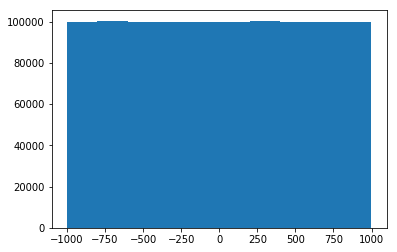

In [13]:
list = rInts()
hist_rInts = plt.hist(list) #,bins=100, density=True, edgecolor='black')

In [14]:
#hist_rPInts = plt.hist(rPInts(), density=True, edgecolor='black')

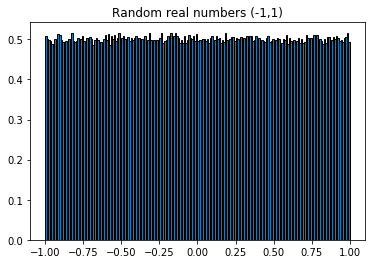

In [15]:
hist_rReals = plt.hist(rReals01(), bins=200, density=True, edgecolor='black')
plt.title('Random real numbers (-1,1)')
plt.savefig('rReals.png',transparent=True)
#plt.show()

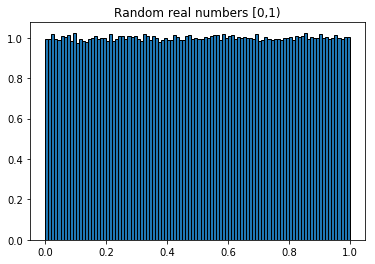

In [16]:
hist_rPReals = plt.hist(rPReals01(), bins=100, density=True, edgecolor='black')
plt.title('Random real numbers [0,1)')
plt.savefig('rPReals.png',transparent=True)
#plt.show()

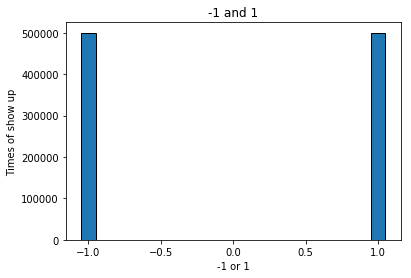

In [17]:
#hist_fifsix = plt.hist(fifties_sixties(), density=True, edgecolor='black')

x = [-1,1]
y = [fifties_sixties().count(-1), fifties_sixties().count(1)]
plt.bar(x,y,width=0.1, edgecolor='black')
plt.title('-1 and 1')
plt.ylabel("Times of show up")
plt.xlabel('-1 or 1')
plt.savefig('fifties.png',transparent=True)

# Diffuusio
1D, 2D, 3D, 4D

In [245]:
atoms = 5000
steps = 3000
dimension = 2     # valitsee montako ulottuvuutta


### Tiedoston käsittely

In [246]:
def writestep(stepNro):           # kirjoittaa yhden timestepin koordinaatistoon
    coordfile.write(str(atoms) + '\n' + 'Step:' + str(stepNro) + '\n')  # koordinaatistoon stepin numero
    for i in range(atoms):
        x = round((coord_matrix[i][0]),7)       # jokainen koordinaatti
        y = round((coord_matrix[i][1]),7)       # tallennetaan muuttujaan  
        z = round((coord_matrix[i][2]),7)       # jotta se voidaan kirjoittaa
        #coordfile.write(str(i) + '\t' + str(x) + '\t' + str(y) + '\t' + str(z) + '\n')
        coordfile.write('H' + '\t' + str(x) + '\t' + str(y) + '\t' + str(z) + '\n')
    #coordfile.write('\n')

In [247]:
def D1tsteptoList():         # tekee 1D timestepin arvoista listan
    x_list = []
    for i in range(atoms):
        x = round((coord_matrix[i][0]),7)
        x_list.append(x)
    return x_list            # palauttaa yhden timestepin arvot listana

In [248]:
def D1tsteptoHist():        # tekee yhden timestepin arvoista histogrammin
    hist_1Dts = plt.hist(D1tsteptoList(), bins=500, density=True, edgecolor='black')
    plt.title('1D diffusion')
    return hist_1Dts        # palauttaa histogrammin


In [249]:
def D2tsteptoList():         # tekee 2D timestepin r arvoista listan
    r_list = []
    for i in range(atoms):
        x = round((coord_matrix[i][0]),7)
        y = round((coord_matrix[i][1]),7)
        r = np.sqrt(x**2 + y**2)
        r_list.append(r)
    return r_list            # palauttaa yhden timestepin arvot listana

In [250]:
def D2tsteptoHist():        # tekee yhden timestepin r arvoista histogrammin
    hist_2Dts = plt.hist(D2tsteptoList(), bins=500, density=True, edgecolor='black')
    plt.title('2D diffusion')
    return hist_2Dts        # palauttaa histogrammin


### Timestepit

In [251]:
def D1timestep():                # funktio joka tekee uuden timestepin 1D:ssä
    for i in range(atoms):       # käy läpi kaikki atomit
        coord_matrix[i][0] += fifty_sixty()

In [252]:
def D2timestep():                # funktio joka tekee uuden timestepin 2D:ssä
    for i in range(atoms):       # käy läpi kaikki atomit
        theta = rndg.random() * 2 * math.pi
        coord_matrix[i][0] += math.cos(theta)
        coord_matrix[i][1] += math.sin(theta)

In [253]:
def D2Taylorstep(terms):                # funktio joka tekee uuden timestepin 2D:ssä
    for i in range(atoms):       # käy läpi kaikki atomit
        theta = rndg.random() * 2 * math.pi
        coord_matrix[i][0] += Taylor_cos(theta, terms)
        coord_matrix[i][1] += Taylor_sin(theta, terms)

In [254]:
def D3timestep():                # funktio joka tekee uuden timestepin 3D:ssä
    for i in range(atoms):       # käy läpi kaikki atomit
        theta = rndg.random() * 2 * math.pi
        phi = rndg.random() * math.pi
        coord_matrix[i][0] += math.sin(theta) * math.cos(phi)
        coord_matrix[i][1] += math.sin(theta) * math.sin(phi)
        coord_matrix[i][2] += math.cos(theta)

In [255]:
def D4timestep():                # funktio joka tekee uuden timestepin 4D:ssä
    for i in range(atoms):       # käy läpi kaikki atomit
        theta = rndg.random() * 2 * math.pi
        phi = rndg.random() * math.pi
        psi = rndg.random() * math.pi
        coord_matrix[i][0] += math.sin(psi) * math.sin(phi) * math.sin(theta)
        coord_matrix[i][1] += math.sin(psi) * math.sin(phi) * math.cos(theta)
        coord_matrix[i][2] += math.sin(psi) * math.cos(phi)
        coord_matrix[i][3] += math.cos(psi)

In [256]:
dimension

2

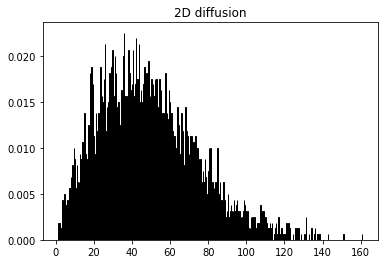

In [257]:
coordfile = open("D{}coord.xyz".format(dimension),'w')   # avataan koordinaattitiedosto käsiteltäväksi
coord_matrix = np.zeros((atoms, 4), dtype = np.float32)   # initialize matrix for 4D coords
D1diff_histArray = pd.Series()        # initialize array for 1D-histograms
D1df = pd.DataFrame(index=range(1,atoms+1))   # initialize DF for all 1D values 
D2df = pd.DataFrame(index=range(1,atoms+1))   # initialize DF for all 2D r values 
for i in range(steps+1):          # käy läpi kaikki timestepit
    if i%100 == 0:
        writestep(i)                  # kirjoittaa timestepin koordinaatistoon
    if dimension == 1:            # vain 1D tapaus
        if i > (steps-1):
            D1df['Step:{}'.format(i)] = D1tsteptoList()            # 1D timestepin lista lisätään DataFrameen
            #D1diff_histArray['Step:{}'.format(i)] = D1tsteptoHist()  # 1D timestepin histogrammi lisätään Arrayhin
            D1_hist = D1tsteptoHist()
            plt.savefig("D1_hist.png")
        D1timestep()              # uus timestep
    elif dimension == 2:          # vain 2D tapaus
        if i > (steps-1):
            D2df['Step:{}'.format(i)] = D2tsteptoList()            # 1D timestepin lista lisätään DataFrameen
            D2_hist = D2tsteptoHist()
            plt.savefig("D2_hist.png")
        D2timestep()              # uus timestep
    elif dimension == 3:          # vain 3D tapaus
        D3timestep()              # uus timestep
    elif dimension == 4:          # vain 4D tapaus
        D4timestep()              # uus timestep


coordfile.close()                 # suljetaan tiedosto

In [258]:
D2df['r**2'] = D2df['Step:{}'.format(steps)]**2

In [259]:
D2df['r**2'].describe()

count     5000.000000
mean      2896.224121
std       2902.496740
min          1.402323
25%        848.670323
50%       1998.400691
75%       4001.431520
max      25877.813274
Name: r**2, dtype: float64

In [213]:
D1df['x**2'] = D1df['Step:{}'.format(steps)]**2

In [214]:
D1df['x**2'].describe()

count     5000.000000
mean      1048.736000
std       1504.722663
min          0.000000
25%        100.000000
50%        484.000000
75%       1444.000000
max      20164.000000
Name: x**2, dtype: float64

## Taylor sin&cos

In [58]:
def Taylor_sin(a, terms):
    a = a
    series = a
    for i in range(1, terms):
        term = (-1)**i * a**(2 * i + 1) / math.factorial(2 * i + 1)
        series += term
    return series
    
def Taylor_cos(a, terms):
    a = a
    series = 1
    for i in range(1, terms):
        term = (-1)**i * a**(2 * i) / math.factorial(2 * i)
        series += term
    return series

coordfile = open("D{}coord.xyz".format(dimension),'w')   # avataan koordinaattitiedosto käsiteltäväksi
coord_matrix = np.zeros((atoms, 4), dtype = np.float32)   # initialize matrix for 4D coords
D1diff_histArray = pd.Series()        # initialize array for 1D-histograms
D1df = pd.DataFrame(index=range(1,atoms+1))   # initialize DF for all 1D values 
D2df = pd.DataFrame(index=range(1,atoms+1))   # initialize DF for all 2D r values 
for i in range(steps+1):          # käy läpi kaikki timestepit
    if i%100 == 0:
        writestep(i)                  # kirjoittaa timestepin koordinaatistoon
    if dimension == 1:            # vain 1D tapaus
        if i > (steps-1):
            #D1df['Step:{}'.format(i)] = D1tsteptoList()            # 1D timestepin lista lisätään DataFrameen
            #D1diff_histArray['Step:{}'.format(i)] = D1tsteptoHist()  # 1D timestepin histogrammi lisätään Arrayhin
            D1_hist = D1tsteptoHist()
            plt.savefig("D1_hist.png")
        D1timestep()              # uus timestep
    elif dimension == 2:          # vain 2D tapaus
        if i > (steps-1):
            D2df['Step:{}'.format(i)] = D2tsteptoList()            # 1D timestepin lista lisätään DataFrameen
            D2_hist = D2tsteptoHist()
            plt.savefig("D2_hist.png")
        D2Taylorstep(2)              # uus timestep
    elif dimension == 3:          # vain 3D tapaus
        D3timestep()              # uus timestep
    elif dimension == 4:          # vain 4D tapaus
        D4timestep()              # uus timestep
coordfile.close()                 # suljetaan tiedosto

### 1D histogrammi

In [35]:
dimension

2

# MJ To-do
1D: histogrammit eri n_steps   + r expectation
2D: 

#### More stuff
- sinit ja cosinit Tayloreina
- 1D histogrammi(t) (joka stepille nii saa gif:in) ja taustalle gaussin jakauma
- laske odotusarvot


## Normaalijakauma

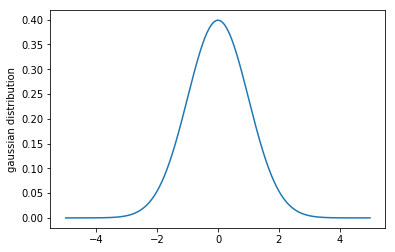

In [36]:
# 1.

mean = 0; std = 1; variance = np.square(std)
x = np.arange(-5,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

# 2.

import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()

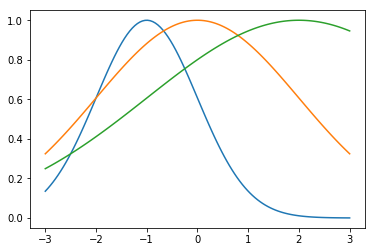

In [37]:
# 3.

from matplotlib import pyplot as mp

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-3, 3, 120)
for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    mp.plot(x_values, gaussian(x_values, mu, sig))

mp.show()

# Lauran xyz-maker

In [38]:
atoms = 100
steps = 50
matrix = np.ones((atoms, 2), dtype = np.float32)
       
for i in range(atoms):
    matrix[i][0] = 0
    matrix[i][1] = 0

def timestep():
    for i in range(atoms):
        a = random.random()
        matrix[i][0] += math.cos(a * 2 * math.pi)
        matrix[i][1] += math.sin(a * 2 * math.pi)

f = open("xyz.txt", "a")    # avaa koordinaatiston kirjoitettavaksi
f.write(str(atoms) + '\n')  # atomien määrä
for g in range(atoms):      # eka steppi eli nollat kaikkiin
    f.write('\n' + str(g + 1) + '\t0\t0\t0')
f.write('\n')               
for i in range(steps):      
    timestep()              # muuttaa matriisiin uuden arvon 
    f.write(str(atoms) + '\n')   # atomien määrä taas
    for h in range(atoms):
        d = round((matrix[h][0]), 3)   # x-koordinaatti
        e = round((matrix[h][1]), 3)   # y-koordinaatti
        f.write('\n' + str(h + 1) + '\t' + str(d) + '\t' + str(e) + '\t 0')   # kirjottaa rivin
    f.write('\n')    



## Python intrinsic Random generator

In [39]:
list01 = []

for x in range(n_nums):
    list01.append(random.random())
    
#list01

In [40]:
list02 = []

for x in range(n_nums):
    list02.append(random.uniform(-1,1))
    
#list02

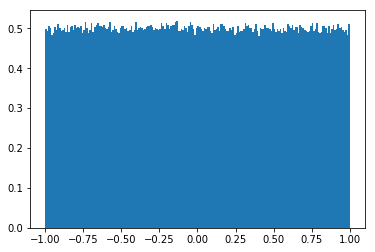

In [41]:
kuva2 = plt.hist(list02, bins=200, density=True)

In [42]:
count01 = np.zeros(n_nums)
count02 = np.zeros(2*n_nums)

count01[5]+=1
print(count01)

[0. 0. 0. ... 0. 0. 0.]


In [43]:
space1 = np.linspace(0,1,n_nums)
space2 = np.linspace(0,1,2*n_nums)


from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in y=0")
ax.set_ylim(-1.5,2.5)
line, = ax.plot(xx, zz(0), lw=3)

# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

def make_frame_mpl(t):
    line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
animation.write_gif("sinc_mpl.gif", fps=20)


## Kyssäreitä
- laitetaanko histogrammeista vaan viimeset kuvat?